In [1]:
%matplotlib inline
import subsurface as swung
swung.__version__

'0.1.0'

# Curve with `xarray`

In [2]:
import lasio

In [3]:
l = lasio.read('data/P-129_out.LAS')

In [4]:
l.curves['GR']

CurveItem(mnemonic=GR, unit=gAPI, value=, descr=Gamma-Ray, original_mnemonic=GR, data.shape=(12718,))

In [5]:
l.plot()

AttributeError: 'LASFile' object has no attribute 'plot'

## Class definition

In [6]:
import subsurface as swung

In [7]:
c = swung.curve.from_lasio(l.curves.DT, basis=l.curves.DEPT.data)

In [8]:
c

Curve(DT, 12718 samples, start=1.0668)

In [9]:
c.values

array([nan, nan, nan, ..., nan, nan, nan])

In [10]:
c._xarray

<xarray.DataArray 'DT' (MD: 12718)>
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
  * MD       (MD) float64 1.067 1.219 1.372 ... 1.939e+03 1.939e+03 1.939e+03

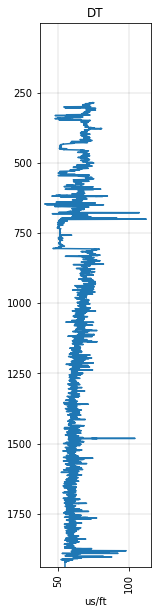

In [11]:
c.plot()

In [12]:
c._xarray

<xarray.DataArray 'DT' (MD: 12718)>
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
  * MD       (MD) float64 1.067 1.219 1.372 ... 1.939e+03 1.939e+03 1.939e+03

In [13]:
c[5000:5100]

Curve(DT, 100 samples, start=763.0668)

In [14]:
c.loc[763.3716]

<xarray.DataArray 'DT' ()>
array(51.828415)
Coordinates:
    MD       float64 763.4

In [15]:
c.loc[763.0]

KeyError: 763.0

In [18]:
c.interp(MD=763.3)

<xarray.DataArray 'DT' ()>
array(51.851635)
Coordinates:
    MD       float64 763.3

In [19]:
mds = [305, 306, 307, 308]

c.interp(MD=mds, method='nearest')

<xarray.DataArray 'DT' (MD: 4)>
array([75.880272, 71.935768, 69.929512, 72.704247])
Coordinates:
  * MD       (MD) int64 305 306 307 308

See also http://xarray.pydata.org/en/stable/interpolation.html

## Testing

In [5]:
import numpy as np
from subsurface import curve

data = np.arange(100)
coords = np.linspace(0, 10, data.size)
curve.Curve(data, coords)

Curve(CURVE, 100 samples, start=0.0)

## Seismic

In [5]:
s = swung.seismic.from_segy('../tests/data/test.segy')

In [6]:
s

<xarray.DataArray (ilines: 10, xlines: 10, samples: 100)>
array([[[0.000000e+00, 1.000000e-05, ..., 9.800000e-04, 9.899999e-04],
        [9.999998e-03, 1.001000e-02, ..., 1.098000e-02, 1.099000e-02],
        ...,
        [7.999998e-02, 8.001000e-02, ..., 8.097994e-02, 8.098996e-02],
        [8.999997e-02, 9.000999e-02, ..., 9.097999e-02, 9.099001e-02]],

       [[1.000000e+00, 1.000010e+00, ..., 1.000979e+00, 1.000990e+00],
        [1.009999e+00, 1.010010e+00, ..., 1.010980e+00, 1.010989e+00],
        ...,
        [1.080000e+00, 1.080009e+00, ..., 1.080979e+00, 1.080990e+00],
        [1.089999e+00, 1.090010e+00, ..., 1.090980e+00, 1.090990e+00]],

       ...,

       [[8.000000e+00, 8.000010e+00, ..., 8.000980e+00, 8.000990e+00],
        [8.010000e+00, 8.010010e+00, ..., 8.010980e+00, 8.010990e+00],
        ...,
        [8.080000e+00, 8.080010e+00, ..., 8.080980e+00, 8.080990e+00],
        [8.090000e+00, 8.090010e+00, ..., 8.090980e+00, 8.090990e+00]],

       [[9.000000e+00, 9.000010e

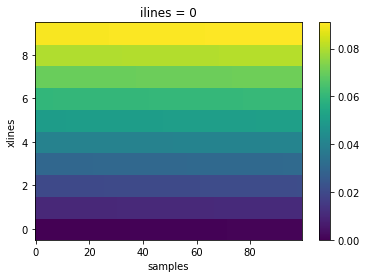

In [7]:
s[0].plot()